# Restaurant tipping demo

Demo built to match Matlab's restaurant tipping example.
https://www.mathworks.com/help/fuzzy/working-from-the-command-line.html

In [1]:
import zadeh

## System definition

Define the input variables

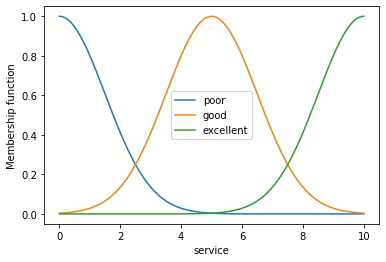

In [2]:
service = zadeh.FuzzyVariable(
    zadeh.FloatDomain("service", 0, 10, 100),
    {
        "poor": zadeh.GaussianFuzzySet(1.5, 0),
        "good": zadeh.GaussianFuzzySet(1.5, 5),
        "excellent": zadeh.GaussianFuzzySet(1.5, 10),
    },
)
service.plot()

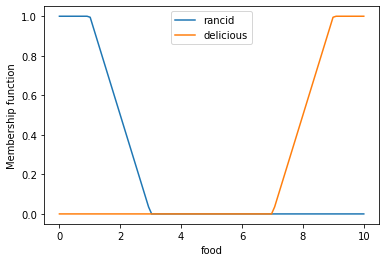

In [3]:
food = zadeh.FuzzyVariable(
    zadeh.FloatDomain("food", 0, 10, 100),
    {
        "rancid": zadeh.TrapezoidalFuzzySet(-2, 0, 1, 3),
        "delicious": zadeh.TrapezoidalFuzzySet(7, 9, 10, 12),
    },
)
food.plot()

Define the output variable

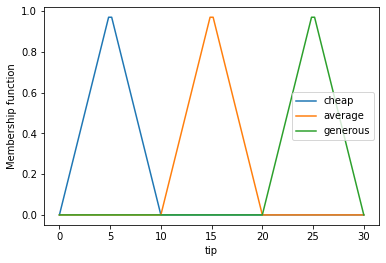

In [4]:
tip = zadeh.FuzzyVariable(
    zadeh.FloatDomain("tip", 0, 30, 100),
    {
        "cheap": zadeh.TriangularFuzzySet(0, 5, 10),
        "average": zadeh.TriangularFuzzySet(10, 15, 20),
        "generous": zadeh.TriangularFuzzySet(20, 25, 30),
    },
)
tip.plot()

Define the rules

In [5]:
rule_set = zadeh.FuzzyRuleSet(
    [
        zadeh.FuzzyRule(
            zadeh.FuzzyValuation(service, "poor")
            | zadeh.FuzzyValuation(food, "rancid"),
            zadeh.FuzzyValuation(tip, "cheap"),
        ),
        zadeh.FuzzyRule(
            zadeh.FuzzyValuation(service, "good"), zadeh.FuzzyValuation(tip, "average"),
        ),
        zadeh.FuzzyRule(
            zadeh.FuzzyValuation(service, "excellent")
            | zadeh.FuzzyValuation(food, "delicious"),
            zadeh.FuzzyValuation(tip, "generous"),
        ),
    ]
)

for rule in rule_set:
    print(rule)

if ((service is poor) or (food is rancid)) then (tip is cheap)
if (service is good) then (tip is average)
if ((service is excellent) or (food is delicious)) then (tip is generous)


In [6]:
fis=zadeh.FIS([food, service], rule_set, tip)

## Usage

Single prediction

In [7]:
fis.get_crisp_output({"food":9, "service":7})

21.048568176040792

Automatically generate an interactive explorer using ipywidgets (only visible when running the notebook)

In [8]:
fis.get_interactive()

interactive(children=(FloatSlider(value=0.0, description='food', max=10.0), FloatSlider(value=0.0, description…

Plot the surface

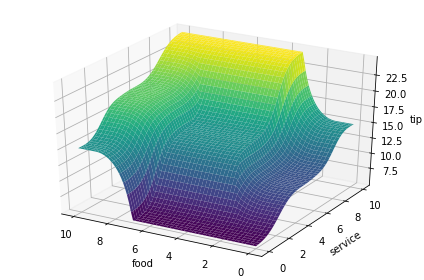

In [9]:
import matplotlib.pyplot as plt
fis.plot_surface()
plt.tight_layout()

## Structured description

In [10]:
d=fis.get_description()
d

{'variables': [{'name': 'food',
   'values': {'rancid': {'type': 'trapezoidal',
     'a': -2,
     'b': 0,
     'c': 1,
     'd': 3},
    'delicious': {'type': 'trapezoidal', 'a': 7, 'b': 9, 'c': 10, 'd': 12}},
   'domain': {'type': 'FloatDomain',
    'name': 'food',
    'min': 0,
    'max': 10,
    'steps': 100}},
  {'name': 'service',
   'values': {'poor': {'type': 'gaussian', 'a': 1.5, 'c': 0},
    'good': {'type': 'gaussian', 'a': 1.5, 'c': 5},
    'excellent': {'type': 'gaussian', 'a': 1.5, 'c': 10}},
   'domain': {'type': 'FloatDomain',
    'name': 'service',
    'min': 0,
    'max': 10,
    'steps': 100}}],
 'rules': {'rule_list': [{'antecedent': {'type': 'or',
     'children': [{'type': 'is', 'variable': 'service', 'value': 'poor'},
      {'type': 'is', 'variable': 'food', 'value': 'rancid'}]},
    'consequent': {'type': 'is', 'variable': 'tip', 'value': 'cheap'}},
   {'antecedent': {'type': 'is', 'variable': 'service', 'value': 'good'},
    'consequent': {'type': 'is', 'variab

In [11]:
fis2=zadeh.FIS.from_description(d)

In [12]:
fis2.get_description()

{'variables': [{'name': 'food',
   'values': {'rancid': {'type': 'trapezoidal',
     'a': -2,
     'b': 0,
     'c': 1,
     'd': 3},
    'delicious': {'type': 'trapezoidal', 'a': 7, 'b': 9, 'c': 10, 'd': 12}},
   'domain': {'type': 'FloatDomain',
    'name': 'food',
    'min': 0,
    'max': 10,
    'steps': 100}},
  {'name': 'service',
   'values': {'poor': {'type': 'gaussian', 'a': 1.5, 'c': 0},
    'good': {'type': 'gaussian', 'a': 1.5, 'c': 5},
    'excellent': {'type': 'gaussian', 'a': 1.5, 'c': 10}},
   'domain': {'type': 'FloatDomain',
    'name': 'service',
    'min': 0,
    'max': 10,
    'steps': 100}}],
 'rules': {'rule_list': [{'antecedent': {'type': 'or',
     'children': [{'type': 'is', 'variable': 'service', 'value': 'poor'},
      {'type': 'is', 'variable': 'food', 'value': 'rancid'}]},
    'consequent': {'type': 'is', 'variable': 'tip', 'value': 'cheap'}},
   {'antecedent': {'type': 'is', 'variable': 'service', 'value': 'good'},
    'consequent': {'type': 'is', 'variab